# **1. Explain Supervised vs. Unsupervised Learning**

### **Supervised Learning**

**Definition:**  
The model learns from **labeled data** — where both the input (features) and the output (target/label) are provided.

**Goal:**  
Predict the output for new, unseen data based on the patterns learned.

**Example:**  
Predicting house prices based on features like size, location, etc.

**Types:**
- **Regression:** Predict continuous output  
  _e.g., predicting temperature, sales, price._
- **Classification:** Predict categorical output  
  _e.g., spam vs. not spam, disease vs. no disease._

**Common Algorithms:**
- Linear Regression  
- Decision Trees  
- Random Forest  
- Support Vector Machines (SVM)  
- Logistic Regression  
- K-Nearest Neighbors (KNN)  

---

### **Unsupervised Learning**

**Definition:**  
The model works with **unlabeled data** — no output label is given. It tries to find hidden patterns or structure in the data.

**Goal:**  
Explore the structure or distribution in the data.

**Example:**  
Grouping customers based on purchasing behavior.

**Types:**
- **Clustering:** Group similar data points together  
  _e.g., customer segmentation._
- **Dimensionality Reduction:** Reduce the number of features while preserving patterns  
  _e.g., PCA, t-SNE._

**Common Algorithms:**
- K-Means Clustering  
- Hierarchical Clustering  
- DBSCAN  
- Principal Component Analysis (PCA)  

### Key Differences:

| Feature              | Supervised Learning                 | Unsupervised Learning             |
|----------------------|-------------------------------------|-----------------------------------|
| Data                 | Labeled                             | Unlabeled                         |
| Goal                 | Predict output                      | Find patterns or structure        |
| Output Known?        | Yes                                 | No                                |
| Example Task         | Spam detection                      | Market segmentation               |


---

## **2. EDA**

### Import libraries and Data

In [339]:
import pandas as pd 
import numpy as np
import matplotlib as plt 
import seaborn as sns
from tabulate import tabulate as tb

df = pd.read_csv('Bangalore.csv')
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,5364000,590,Chandapura,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6203,8716000,1179,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6204,7373000,1143,Kasavanahalli,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
6205,4985000,1680,Kasavanahalli,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


#### Checing shape of the data

In [340]:
print(df.shape)
df.columns

(6207, 40)


Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Stadium'],
      dtype='object')

#### Cheking null values

In [341]:
df.isna().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Stadium                0


#### Overall data is not contain null values but the problem is,
#### first see here we see all the rows of the dataset

In [342]:
pd.set_option('display.max_rows',None)

I am show here basic information of the data which column contain which type of data type 

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [344]:
# df[df['JoggingTrack'] != 9].tail(5)

Each column not contain null values but the thing is that all the column contain value in binary style as 0 or 1 which means yes or no or we can say as True or False 
but the problem is only 0 and 1 is ongoing till 1950 index's row and then all the data are into 9 here i put a sample of it.

First i reset option for max_rows

In [345]:
pd.reset_option('display.max_rows')

Okay, so here i just create dummy dataset for only applying things till 1950's index

In [346]:
df = df.iloc[:1951]
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,8306999,1184,Hosa Road,2,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1947,4883000,655,Hosa Road,1,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1948,11500000,1680,Hosa Road,3,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1949,8378000,1195,Hosa Road,2,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0


In [347]:
df.shape

(1951, 40)

### Now we have a clean data 
Steps :
1. Visualize the distribution of sales prices  
2. Visualize the Relationship Between Area and Sale Price:
3. Check correlation 

overhere i give importance of two column only, which is 'Area' and 'Price', Area is indipendente and Price is
Dependent vriable.

---

In [ ]:
print(df['Price'].describe().app      
      ly(lambda x: format(x, '.2f')))

count         1951.00
mean       9953003.02
std       12930158.36
min        2096000.00
25%        4973500.00
50%        6950000.00
75%       10000000.00
max      202700000.00
Name: Price, dtype: object


#### 1. Visualize the distribition of sales price 

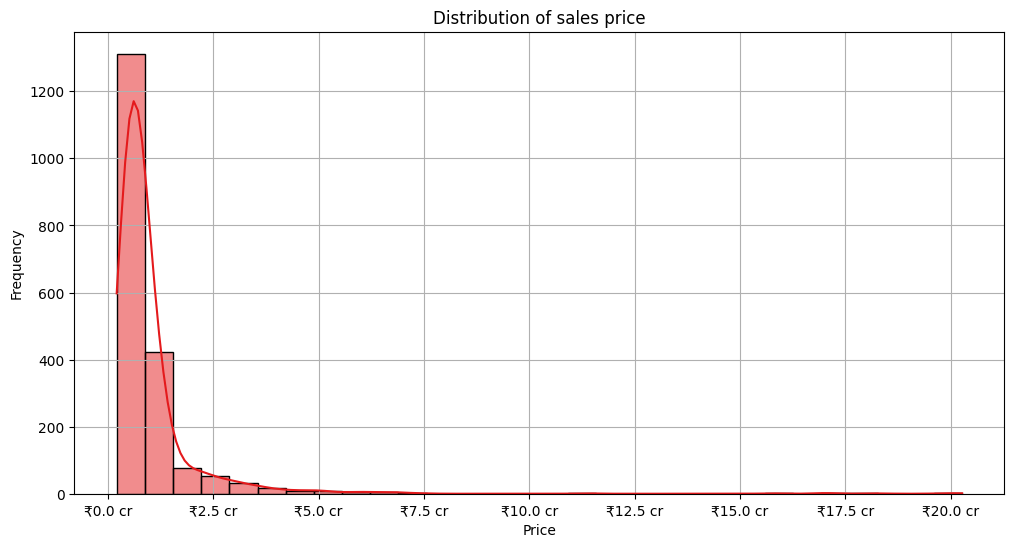

In [349]:
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mtick

sns.set_palette('Set1')
plt.figure(figsize=(12,6))
sns.histplot(df['Price'],bins=30,kde=True)
plt.title('Distribution of sales price')
plt.ylabel('Frequency')
plt.grid()

# additional thing is that here i import new library of matplotlib is ticker 
# basically i want price tick as corore format instead of percentage like (0.25,1.25, etc...)
# so here i add ticker for converting format of xticks 
# Funcformatter is basically Function formating i use lambda function for convert into corore and there is 
# one type of string formula which is '1e7' that means after any value how many zero are there 
# corore has 7 zeros so that's why i am addind 1e7  and then apply plt.gca() on xaxis 

formatter = mtick.FuncFormatter(lambda x, _: f'₹{x/1e7} cr')
plt.gca().xaxis.set_major_formatter(formatter)

####  2. Visualizing the relationships between Area and Price 

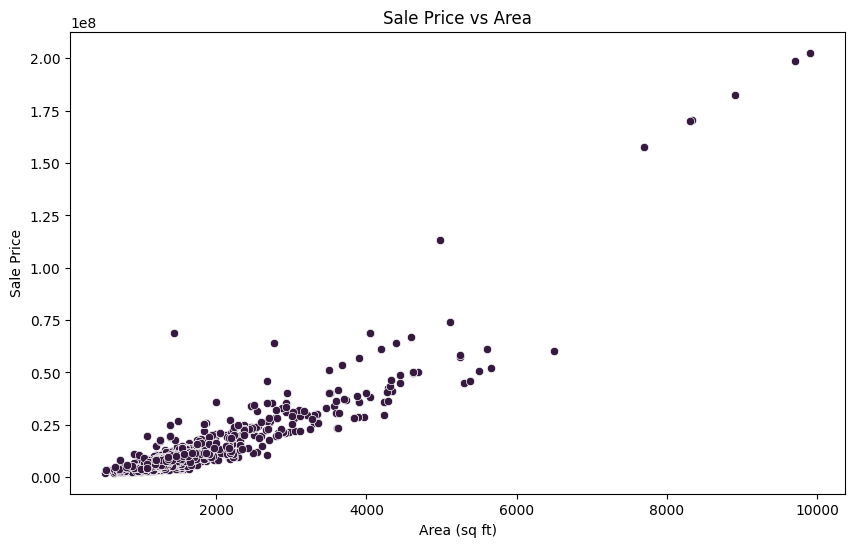

In [350]:
sns.set_palette('rocket')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Sale Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()


#### 3. Check correlation 

If i want to check correlation between features so as we are all know machine understand numerical data intead of categotical so here almost all column contain categorical data but some column such as 'Location' not cointain numerical values so i use onehot endocing to convert numerical values to whole the dataset 

In [351]:
df.Location

0                      JP Nagar Phase 1
1            Dasarahalli on Tumkur Road
2       Kannur on Thanisandra Main Road
3                          Doddanekundi
4                               Kengeri
                     ...               
1946                          Hosa Road
1947                          Hosa Road
1948                          Hosa Road
1949                          Hosa Road
1950                          Hosa Road
Name: Location, Length: 1951, dtype: object

In [352]:
df_encode = pd.get_dummies(df,drop_first=True)

Showing encoded data

In [353]:
pd.set_option('display.max_rows',None)

correlation = df_encode.corr()
print(correlation['Price'].sort_values(ascending=False))

Price                                               1.000000
Area                                                0.902326
No. of Bedrooms                                     0.528871
Location_Hebbal                                     0.515389
Location_Richmond Town                              0.195142
Location_JP Nagar Phase 4                           0.188966
ClubHouse                                           0.172406
SportsFacility                                      0.169489
Location_JP Nagar Phase 6                           0.165667
Location_Rajajinagar                                0.155475
JoggingTrack                                        0.150674
SwimmingPool                                        0.150607
CarParking                                          0.141360
BED                                                 0.138189
AC                                                  0.136778
Stadium                                             0.136387
Sofa                    

Visualize of correlation based on price 

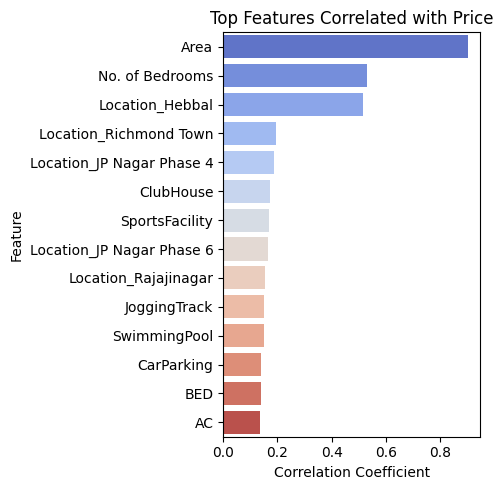

In [354]:
price_corr = df_encode.corr()['Price'].sort_values(ascending=False)[1:15]  

plt.figure(figsize=(5,5))
sns.barplot(x=price_corr, y=price_corr.index,hue=price_corr.index,palette='coolwarm')
plt.title('Top Features Correlated with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


# **Insights** 

## 1. **Price Scenario** 

Araound Starting at **2096000** and max to max is **202700000** which is too high,

- 25%        4973500.00
- 50%        6950000.00
- 75%       10000000.00

Majorly most of people can not affort price after **60% to 75%** above which is too high so instead of focusing those scenario we need create some reasonable price which is in between **10% to 55%**.

## **2. "Top Features Correlated with Price"**

What Affects Property Price the Most?

1. **Area (Size of the property)**

   * This has the **strongest impact** on price. Bigger homes generally cost more.

2. **Number of Bedrooms**

   * More bedrooms often mean higher prices.

3. **Location (e.g., Hebbal, Richmond Town, JP Nagar)**

   * Where the property is located also plays a **major role** in pricing.
   * Premium areas like **Hebbal** and **Richmond Town** push prices higher.

4. **ClubHouse, Sports Facility, Jogging Track, Swimming Pool**

   * Amenities like these have **some impact** — homes with such features may cost more.

5. **Car Parking, AC, BED**

   * These features show **lower influence**, but still affect the price slightly.


#### Simple Summary:

**The bigger the house and the better the location, the higher the price.** Extra features like a clubhouse, gym, and swimming pool add value too, but not as much as size and location.



## 3. **How Home Size Affects Price**

1. **Bigger homes usually cost more**

   * As the **area increases**, the **price also increases** — you can see the dots forming an upward trend.

2. **Strong Positive Relationship**

   * There's a clear pattern: more space means higher cost. This shows a **strong connection between home size and sale price**.

3. **Few exceptions**

   * Some homes with similar size have different prices. This might be due to:

     * Location
     * Amenities
     * Construction quality


#### In Simple Words:

"The larger the house, the more expensive it tends to be — but other factors like location and features also matter."


---

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder


df_encode = df.copy()

enco = LabelEncoder()
l_e = enco.fit_transform(df_encode['Location'])
df_encode['Location'] = l_e

## **1. Linear Regression**

#### Importing such usefull librarys of sklearn 

In [356]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

Split the data into target data and indipendent data assign value to x and y

In [357]:
df_encode.Area

0       3340
1       1045
2       1179
3       1675
4       1670
5       1220
6       2502
7       1438
8       1405
9        660
10      1362
11      1735
12      1575
13      1120
14      1415
15      1270
16      1311
17      1210
18      3340
19      1045
20      1179
21      1675
22      1670
23      1220
24      2502
25      1438
26      1405
27       660
28      1362
29      1735
30      1575
31      1120
32      1415
33      1270
34      1311
35      1210
36      1705
37      1187
38      3340
39      1045
40      1179
41      1675
42      1670
43      1220
44      2502
45      1438
46      1405
47       660
48      1362
49      1735
50      1575
51      1120
52      1415
53      1270
54      1311
55      1210
56      1705
57      1187
58      1270
59      2293
60      1726
61      2470
62      1570
63      1120
64      1506
65      1040
66      1150
67      1045
68      2480
69      1160
70      1143
71      1300
72       966
73      1245
74      1275
75      1085
76      1286

In [358]:
x = df_encode[['Area']]
y = df_encode['Price']

Splitting the data into x,y train,test with 20% of testing data 

In [359]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

Creating object of LinearRegression 

In [360]:
slr = LinearRegression()

In [361]:
# pd.reset_option('display.max_rows')
# x_test.sort_index(ascending=True)

Fit the train data into model 

In [362]:
slr.fit(x_train,y_train)

LinearRegression()

Here i do predictoin of the x test data 

In [363]:
y_pred = slr.predict(x_test)

Checking accurecy of the model by r2_score 

In [364]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8373761588080499
37621684571139.93


In [365]:
print('Intercept:', slr.intercept_)
print('Coefficient for Area:', slr.coef_[0])

Intercept: -12336483.64354686
Coefficient for Area: 14676.401088624503


#### Visualization

<Figure size 1000x600 with 0 Axes>

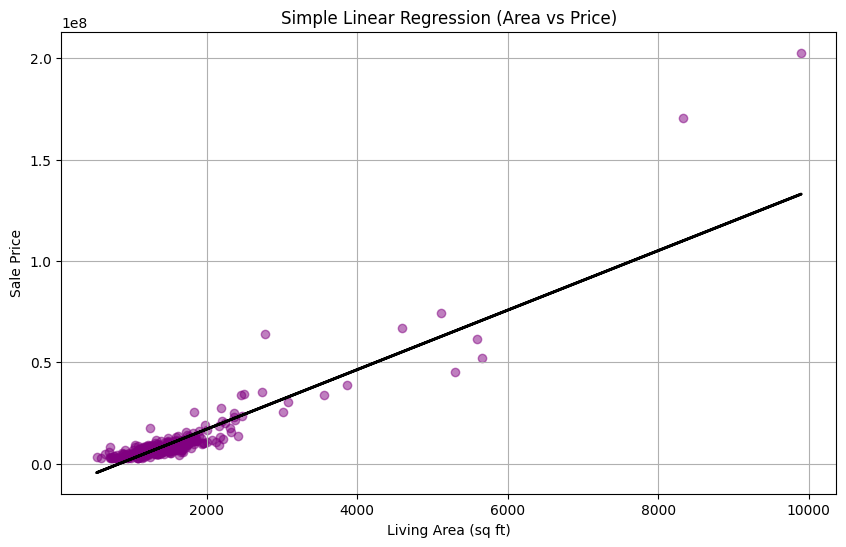


Regression Plot
For cheking actual relationship between y_test data points and y_pred.


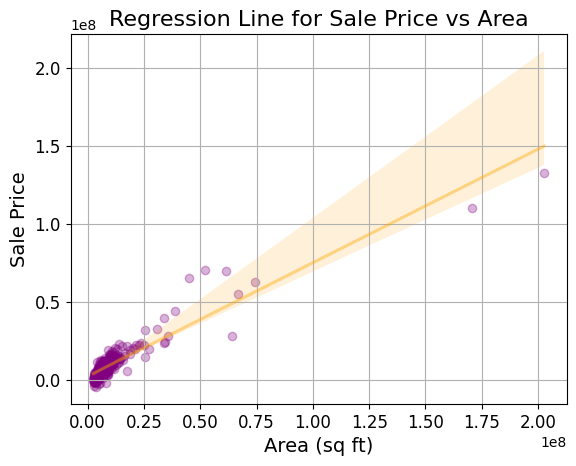

In [366]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette("pastel") 

plt.figure(figsize=(10, 6))



plt.scatter(x_test, y_test, color='purple',alpha=.5)
plt.plot(x_test, y_pred, color='black', linewidth=2)
plt.title('Simple Linear Regression (Area vs Price)')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.grid()
plt.show()

print()

print("Regression Plot")
print("For cheking actual relationship between y_test data points and y_pred.")
sns.regplot(x=y_test, y=y_pred, 
            scatter_kws={'color': 'purple','alpha': .3}, 
            line_kws={'color': 'orange','alpha' : .4})  

plt.title('Regression Line for Sale Price vs Area',fontsize = 16)
plt.xlabel('Area (sq ft)', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.show()


---

## **2. Multiple Linear Regression**

In [367]:
pd.reset_option('max_rows')
df_encode

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,30000000,3340,40,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,24,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,59,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,26,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,61,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,8306999,1184,36,2,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1947,4883000,655,36,1,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1948,11500000,1680,36,3,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1949,8378000,1195,36,2,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0


In [368]:
x = df_encode[['Location','Area']]
y = df_encode['Price']

x_encode = pd.get_dummies(x,drop_first=True)

In [369]:
x_train,x_test,y_train,y_test = train_test_split(x_encode,y,test_size = .2)

In [370]:
mlr = LinearRegression()

In [371]:
mlr.fit(x_train,y_train)

LinearRegression()

In [372]:
y_pred = mlr.predict(x_test)
y_pred

array([ 2.79450208e+07,  1.66527823e+06,  1.25969004e+07,  2.28967757e+06,
        2.75802595e+07,  1.06219765e+07, -1.24733762e+06,  5.23410033e+06,
        1.04445113e+07,  2.13612784e+07,  4.71305379e+06,  1.10744047e+07,
        7.19118725e+06,  3.77975314e+06,  1.08023692e+07,  1.12326235e+07,
        7.64099454e+06,  8.51603187e+06,  3.44401476e+06,  6.16008218e+06,
        3.59210202e+05,  5.18075246e+06, -3.22284010e+06,  5.98502034e+06,
        5.73530305e+07,  3.17899146e+06,  2.74210573e+06,  2.63177085e+07,
        1.01117548e+07,  3.67582179e+06,  1.09088383e+06,  5.42880509e+07,
        2.83973402e+07,  8.24170185e+06,  3.77373497e+06,  3.75548255e+06,
        5.30382144e+06,  5.45361873e+06,  7.55056329e+06,  4.67304289e+06,
        7.99164241e+06,  1.27847751e+07,  9.29707751e+06,  3.72244815e+07,
        5.07535735e+06, -3.13334844e+06,  4.70463227e+06, -9.47255959e+03,
        6.31082506e+05,  6.31082506e+05,  5.77977849e+06,  5.67512506e+06,
        1.12545511e+06,  

In [373]:
r2_score(y_test,y_pred)

0.8166527665483574

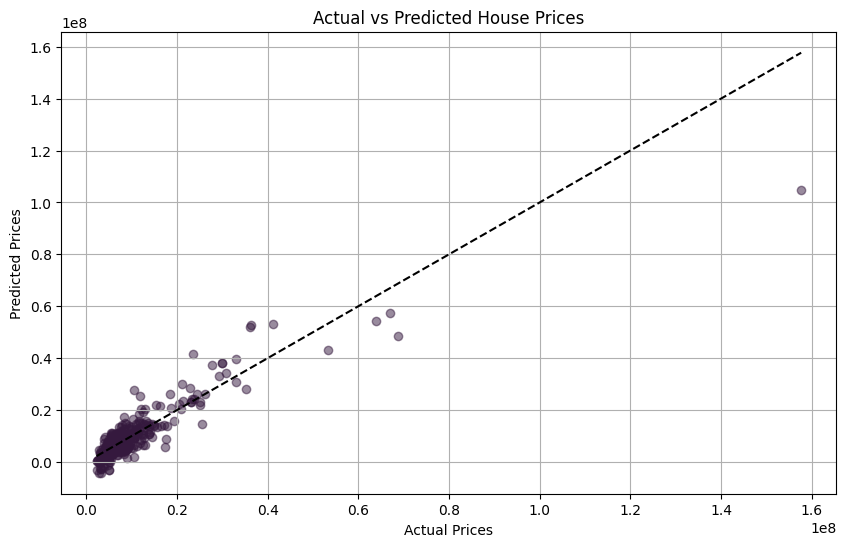

Text(0, 0.5, 'Predicted')

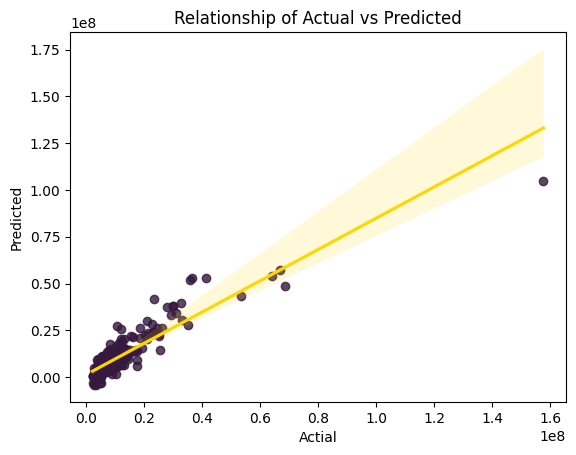

In [374]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()  


plt.title('Relationship of Actual vs Predicted')
sns.regplot(x = y_test,y = y_pred,
            line_kws={'color' : 'gold'})
plt.xlabel('Actial')
plt.ylabel('Predicted')

---

### 3. Use dimensionality reduction technique PCA/LDA and build Multiple Linear
### Regression model to predict Sale price of the house. 

In [375]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pd.reset_option('max_rows')
df_encode_escape_location = df.copy()

In [377]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Price')

In [378]:
x = df[numerical_features]
y = df['Price']

In [379]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [380]:
pca = PCA(n_components=.95)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [381]:
print(f"Original features: {x_train.shape[1]}")
print(f"PCA features: {x_train_pca.shape[1]}")

Original features: 38
PCA features: 1


In [382]:
pca_mlr = LinearRegression()
pca_mlr.fit(x_train_pca,y_train)

LinearRegression()

In [383]:
y_pred = pca_mlr.predict(x_test_pca)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE : ',mse,'\n','R2 Score : ',r2)

MSE :  31414505358362.773 
 R2 Score :  0.6591795825580571


---

### 4. **Build a model using Lasso and Ridge regression to reduce model complexity.**

In [384]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder

In [385]:
df_encode

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
0,30000000,3340,40,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,24,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,59,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,26,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,61,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,8306999,1184,36,2,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1947,4883000,655,36,1,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1948,11500000,1680,36,3,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0
1949,8378000,1195,36,2,0,0,1,1,1,1,...,1,0,0,0,1,0,0,0,0,0


In [386]:
x = df_encode.drop('Price',axis=1)
y = df_encode['Price']

In [387]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)


In [389]:
lasso_reg = Lasso(alpha=0.1,max_iter=10000)
lasso_reg.fit(x_train,y_train)

c:\Users\MAHADEV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.201e+15, tolerance: 2.824e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, max_iter=10000)

In [390]:
y_pred = lasso_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.7957263655241418


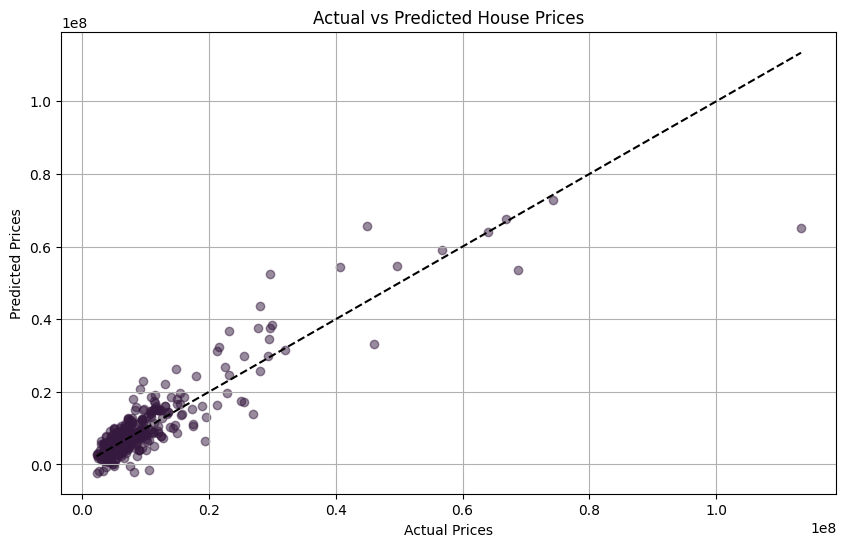

In [391]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

### Ridge Regression

In [392]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train,y_train)

Ridge()

In [393]:
y_pred = ridge_reg.predict(x_test)
y_pred

array([ 4.35863531e+07,  3.06647411e+06,  5.25726730e+06,  1.53416559e+07,
        1.49393472e+07,  7.46434027e+06,  1.08667257e+07,  7.45454954e+06,
        1.39355404e+07,  1.86161235e+07,  1.63927866e+07,  1.91930272e+06,
        3.26065925e+06,  3.76373791e+07,  6.06433323e+06,  5.82203848e+06,
        2.53467603e+06,  9.99414141e+06,  1.29173913e+07,  2.94992055e+04,
        2.23785958e+06,  9.91228439e+06,  1.90562110e+07,  6.01598174e+06,
        4.07791840e+06,  1.06802151e+07,  6.21820804e+06,  8.54546000e+06,
        2.98078326e+06,  6.52113276e+06,  4.32145967e+06,  8.09312537e+06,
        1.49393472e+07,  5.78769222e+06,  2.76290302e+06,  3.51507526e+06,
        3.58685452e+06,  5.09781026e+06,  6.44520280e+05,  7.50819977e+06,
        5.36390252e+07,  9.20308754e+06,  5.23980846e+07,  7.67139218e+06,
        2.03233651e+06, -2.26799149e+06, -1.44785225e+06,  5.47769897e+07,
        1.31057604e+07,  1.16262264e+07,  7.59934911e+06,  7.66831902e+06,
        1.26051956e+07,  

In [394]:
r2_score(y_test,y_pred)

0.7963048268776898

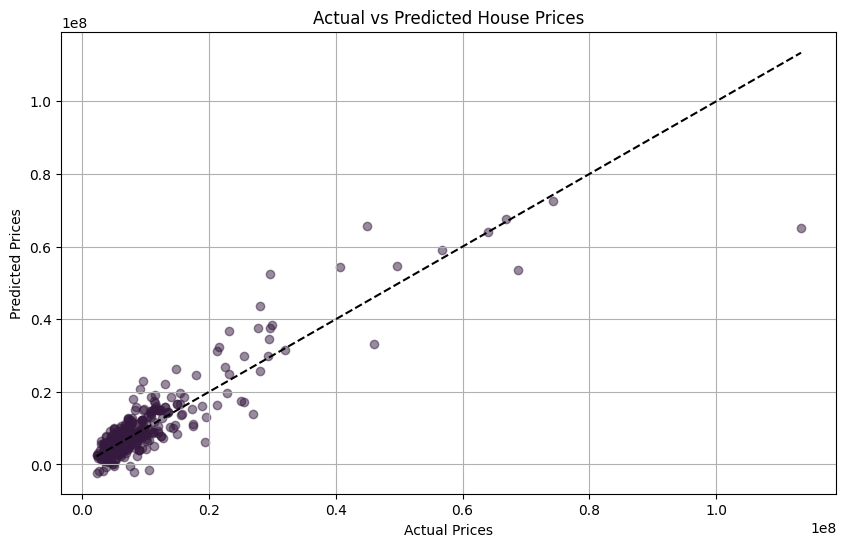

In [395]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

---

### 6. Build an SVR model to predict Sale price of the house

In [396]:
from sklearn.svm import SVR

In [397]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

In [398]:
x = df_encode.drop('Price',axis=1)
y = df_encode['Price']

In [399]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

In [400]:
x_test

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Stadium
1413,1530,85,3,1,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
629,1841,41,3,0,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
492,747,28,2,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
513,1005,75,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,1705,102,3,0,0,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,1530,85,3,1,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1761,1010,57,2,0,0,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
1524,1100,102,2,0,0,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1189,1917,53,3,0,0,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [401]:
svr_model = SVR()
svr_model.fit(x_train,y_train)

SVR()

In [402]:
y_pred = svr_model.predict(x_test)

In [403]:
r2_score(y_test,y_pred)

-0.07877135880745278

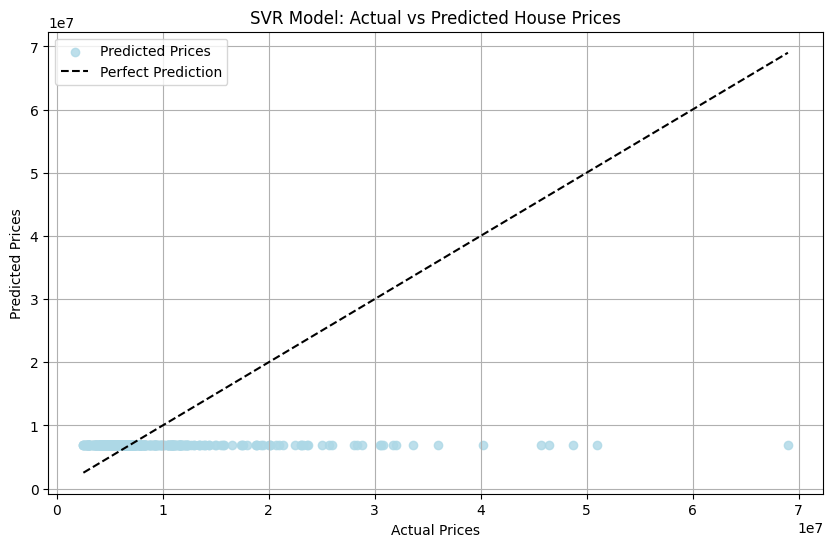

In [404]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='lightblue', label='Predicted Prices',alpha=.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
plt.title('SVR Model: Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid()
plt.show()

### **7. Dicision Tree Regressor**

In [405]:
from sklearn.tree import DecisionTreeRegressor

In [406]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [407]:
y_pred = dtree.predict(x_test)

In [408]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nDecision Tree Regression Results:")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")



Decision Tree Regression Results:
MSE: 14896257314355.41
R2 Score: 0.75


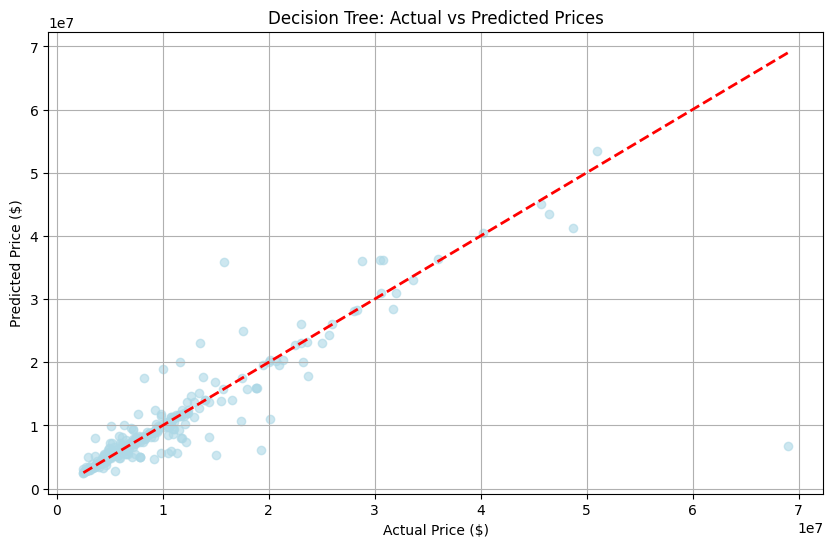

In [409]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='lightblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.grid(True)
plt.show()

### Tree Strucutre representation 

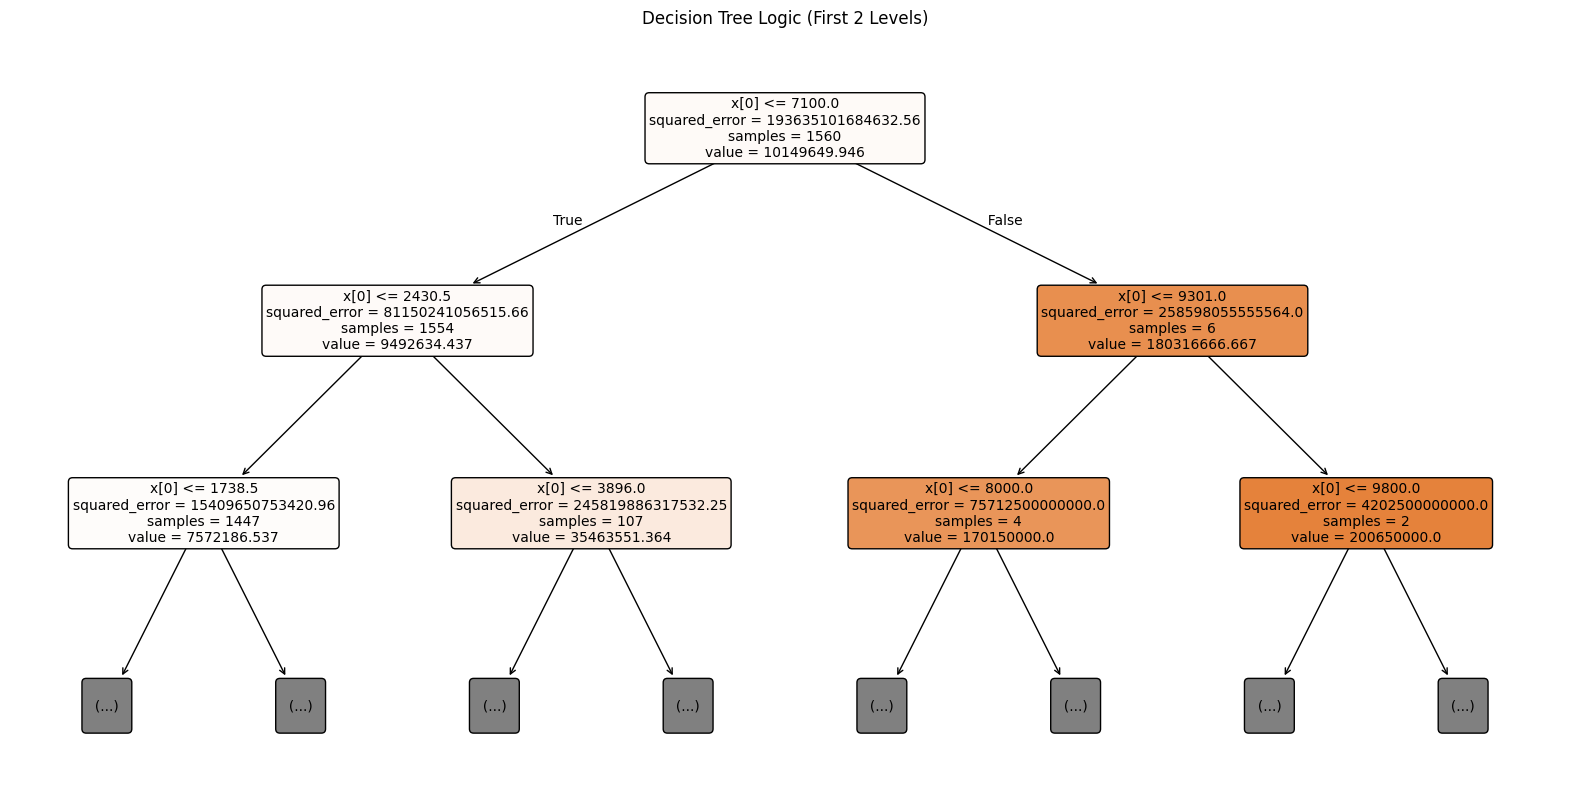

In [410]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
        
plot_tree(dtree, 
          filled=True, 
          rounded=True, 
          max_depth=2, 
          fontsize=10)

plt.title('Decision Tree Logic (First 2 Levels)')
plt.show()

## 8. Random Forest Regressior

In [411]:
from sklearn.ensemble import RandomForestRegressor 

In [412]:
rf = RandomForestRegressor(n_estimators=100,max_depth=10)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10)

In [413]:
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nRandom Forest Regression Results:")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2}")



Random Forest Regression Results:
MSE: 13219108000873.62
R2 Score: 0.7814217104281764


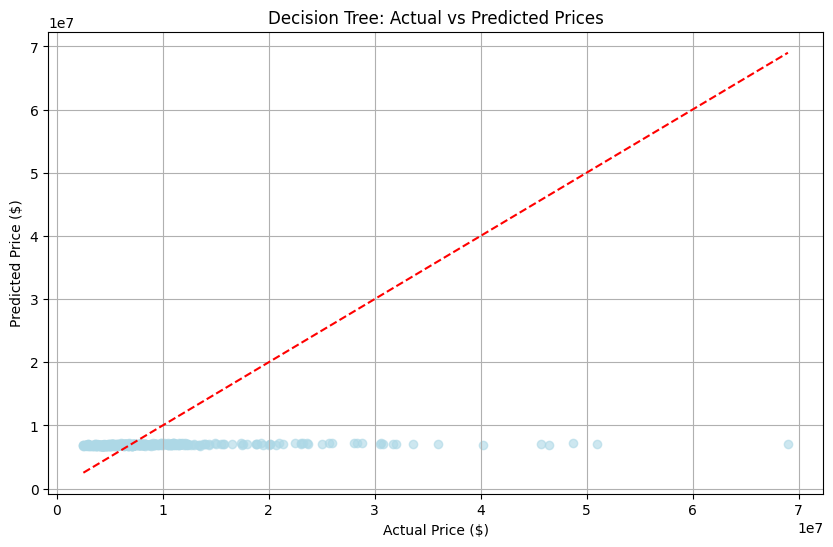

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='lightblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.grid(True)
plt.show()

## **9. Hyperparameter Tuning with GridSearchCV and RandomizedSearchCV**

In [415]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                         param_grid=param_grid,
                         cv=5,
                         n_jobs=-1,
                        #  verbose=2,
                         scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTuned Random Forest (GridSearchCV) Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")



Tuned Random Forest (GridSearchCV) Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 12386728601000.74
R2 Score: 0.80


### RandomizedSearchCV for SVR

In [416]:
param_dist = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5, 1]
}

random_search = RandomizedSearchCV(estimator=SVR(),
                                 param_distributions=param_dist,
                                 n_iter=50,
                                 cv=5,
                                 scoring='neg_mean_squared_error')

random_search.fit(x_train, y_train)

best_svr = random_search.best_estimator_
y_pred = best_svr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"\nTuned SVR (RandomizedSearchCV) Results:")
print(f"Best Parameters: {random_search.best_params_}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")



Tuned SVR (RandomizedSearchCV) Results:
Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'epsilon': 0.01, 'C': 100}
MSE: 17542614675863.77
R2 Score: 0.71


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
x_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

models = [slr, mlr, svr, dtree, rf, ridge_reg, lasso_reg, best_rf, best_svr]
model_names = ['Linear', 'Multiple Linear', 'SVR', 'DecisionTree', 'RandomForest', 'Ridge', 'Lasso', 'Best Random Forest','Best']

for name, model in zip(model_names, models):
   
    model.fit(x_encoded, y_train)
    y_pred = model.predict(x_test_encoded)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}: MAE = {mae:.2f}, RMSE = {mse:.2f}, R2 = {r2:.2f}\n")


Linear: MAE = 2291482.24, RMSE = 58310563181567.52, R2 = 0.04

Multiple Linear: MAE = 2291482.24, RMSE = 58310563181567.52, R2 = 0.04

SVR: MAE = 4258950.24, RMSE = 65218740532538.23, R2 = -0.08

DecisionTree: MAE = 1341282.28, RMSE = 18510345119160.21, R2 = 0.69

RandomForest: MAE = 2440016.83, RMSE = 25874786065982.30, R2 = 0.57

Ridge: MAE = 2541085.23, RMSE = 32476997473987.06, R2 = 0.46



c:\Users\MAHADEV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273421832356018.94, tolerance: 30207075862802.656
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso: MAE = 2270683.75, RMSE = 30926950224060.58, R2 = 0.49

Best Random Forest: MAE = 1388724.40, RMSE = 18921154235759.20, R2 = 0.69

Best: MAE = 4203718.76, RMSE = 64547494642563.23, R2 = -0.07



c:\Users\MAHADEV\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273421832356018.94, tolerance: 30207075862802.656
  model = cd_fast.sparse_enet_coordinate_descent(


Model Comparison:
                        Model           MAE          RMSE  R2 Score
3               Decision Tree  1.305905e+06  4.276661e+06  0.697577
7          Best Random Forest  1.394068e+06  4.435013e+06  0.674767
4               Random Forest  2.369100e+06  4.733759e+06  0.629475
6            Lasso Regression  2.270684e+06  5.561200e+06  0.488622
5            Ridge Regression  2.541085e+06  5.698859e+06  0.462992
0           Linear Regression  2.291482e+06  7.636135e+06  0.035833
1  Multiple Linear Regression  2.291482e+06  7.636135e+06  0.035833
8                    Best SVR  4.203719e+06  8.034146e+06 -0.067294
2   Support Vector Regression  4.258950e+06  8.075812e+06 -0.078394


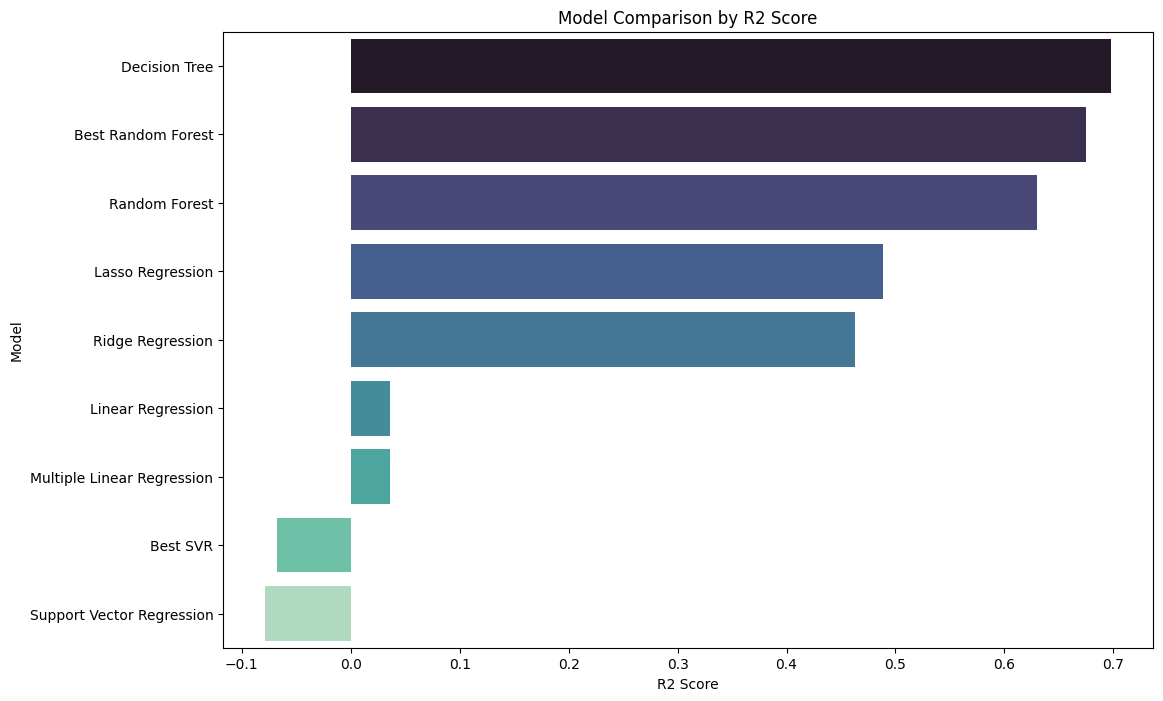

In [418]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

models = {
    'Linear Regression': slr,
    'Multiple Linear Regression': mlr,
    'Support Vector Regression': svr,
    'Decision Tree': dtree,
    'Random Forest': rf,
    'Ridge Regression': ridge_reg,
    'Lasso Regression': lasso_reg,
    'Best Random Forest': best_rf,
    'Best SVR': best_svr
}

results = []

for name, model in models.items():
    model.fit(x_train_encoded, y_train)
    y_pred = model.predict(x_test_encoded)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R2 Score', ascending=False)

print("Model Comparison:")
print(results_df)


plt.figure(figsize=(12, 8))
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='mako',hue='Model')
plt.title('Model Comparison by R2 Score')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()


As per analysis so the best model is **'Decision Tree'**